In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame({
    'x':[1,2,3,4,5,6,7,5,2,3,4,3.8],
    'y':[6,3,8,9,3,7,9,4,2,8,3,7.3],
    'z':[0,1,0,1,1,0,0,1,1,0,1,1]
})

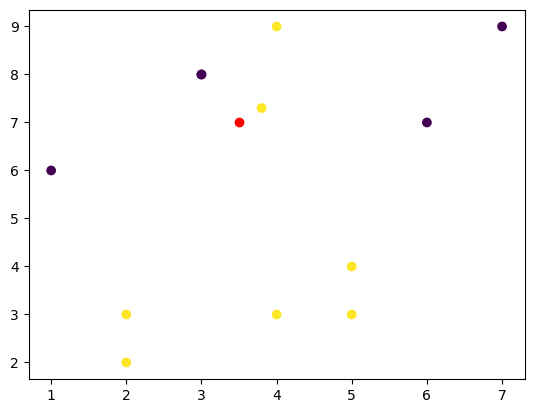

In [3]:
plt.scatter(df['x'],df['y'],c=df['z'])
plt.scatter(3.5, 7, color = 'r')

In [4]:
def ed(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [5]:
ed(3.5,7,3,8)

1.118033988749895

In [6]:
ed(4,6,3.7,6)

0.2999999999999998

In [7]:
np.argmin([1.18,0.29])

1

### Customer Purchase

In [8]:
df1 = pd.read_csv("Social_Network_Ads.csv")
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df1.drop(columns='User ID',inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lb = LabelEncoder()
sc = StandardScaler()

In [11]:
df1['Gender'] = lb.fit_transform(df1['Gender'])
df1[['Age','EstimatedSalary']] = sc.fit_transform(df1[['Age','EstimatedSalary']])

In [12]:
df1

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0
...,...,...,...,...
395,0,0.797057,-0.844019,1
396,1,1.274623,-1.372587,1
397,0,1.179110,-1.460681,1
398,1,-0.158074,-1.078938,0


In [13]:
ind = df1.iloc[:,:3]
dep = df1.iloc[:,-1]

In [14]:
ind

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [15]:
dep

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
xx = df1.iloc

In [17]:
xx

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ind,dep,test_size=0.2,random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
testing = pd.DataFrame({
    'y':y_test,
    'y_hat':knn.predict(x_test)
})
testing.sample(4)

,y,y_hat
68,0,0
37,0,0
7,1,1
102,0,0


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, knn.predict(x_test))

array([[55,  3],
       [ 3, 19]], dtype=int64)

In [22]:
accuracy_score(y_test,knn.predict(x_test))

0.925